In [38]:
#1. load 'iris_data.csv' into a dataframe

import pandas as pd

df = pd.ExcelFile('iris_data.xlsx')
iris_data = df.parse('Fisher\'s Iris Data')
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [39]:
#2. get unique labels (Species column)

iris_data = pd.get_dummies(iris_data,columns=['Species'])
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species_I. setosa,Species_I. versicolor,Species_I. virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


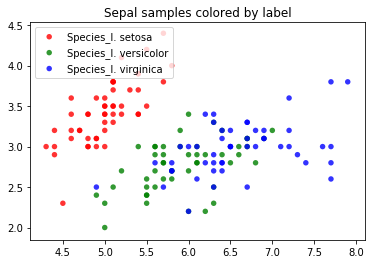

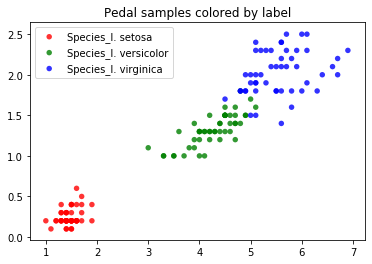

In [40]:
#3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
# Create data

import numpy as np
import matplotlib.pyplot as plt

colors = ("red", "green", "blue")
groups = ("Species_I. setosa", "Species_I. versicolor", "Species_I. virginica")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for color, group in zip(colors, groups):
    irs = iris_data[iris_data[group] == 1]
    x, y = irs['Sepal length'],irs['Sepal width']
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.title('Sepal samples colored by label')
plt.legend(loc=2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for color, group in zip(colors, groups):
    irs = iris_data[iris_data[group] == 1]
    x, y = irs['Petal length'],irs['Petal width']
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.title('Pedal samples colored by label')
plt.legend(loc=2)
plt.show()

In [41]:
#4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters 
#(HINT: estimate_bandwidth() takes an argument: #quantile set it to 0.2 for best result)

from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

bandwidth = estimate_bandwidth(iris_data, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(iris_data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

total_clusters = 0
total_clusters = total_clusters + n_clusters

In [42]:
#5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function

print('Labels : {}'.format(labels))

print('Cluster centers : {}'.format(cluster_centers))

print('Number of clusters : {}'.format(n_clusters))

Labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Cluster centers : [[4.98510638 3.41914894 1.47021277 0.24255319 1.         0.
  0.        ]
 [5.95813953 2.79069767 4.30930233 1.33953488 0.         1.
  0.        ]
 [6.37567568 2.95945946 5.36216216 2.04324324 0.         0.
  1.        ]]
Number of clusters : 3


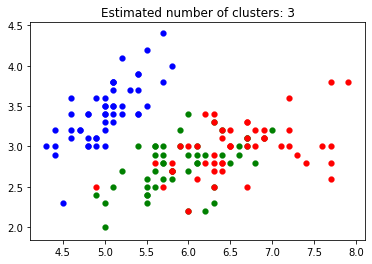

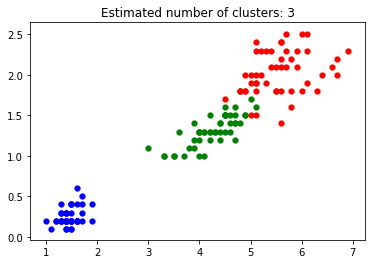

In [43]:
#6. create a new scatter plot where each flower is colored according to cluster label

from itertools import cycle

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    
    x, y = iris_data[my_members]['Sepal length'], iris_data[my_members]['Sepal width']
    ax.scatter(x, y, c=col, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()



fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    
    x, y = iris_data[my_members]['Petal length'], iris_data[my_members]['Petal width']
    ax.scatter(x, y, c=col, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

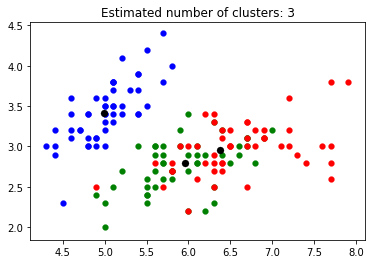

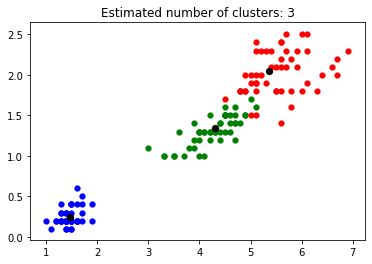

In [44]:
#7. add a dot for the cluster centers

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = iris_data[my_members]['Sepal length'], iris_data[my_members]['Sepal width']
    ax.scatter(x, y, c=col, linewidth=0.2)
    
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()



fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = iris_data[my_members]['Petal length'], iris_data[my_members]['Petal width']
    ax.scatter(x, y, c=col, linewidth=0.2)
    
    ax.scatter(cluster_center[2], cluster_center[3], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

labels_unique: [0 1 2]


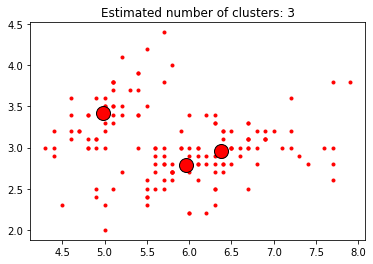

In [45]:
#8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

print("labels_unique:", labels_unique)

for k in range(n_clusters):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(iris_data.iloc[my_members, 0],
             iris_data.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)


plt.title(f'Estimated number of clusters: {total_clusters}')
plt.show()